### Warm-up Exercises:

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

#### - Has the network latency gone up since we switched internet service providers?


- H(null) hypothesis: There's no difference or latency decreased in network speed since switching one company to the next.
    
- H(a) hypothesis: There is an increase in latency since switching from one company to the next.

- True Negative Type 1 Error example: We reject the H(null) that there is no difference of latency, when there really is.

- False Negative Type 2 Error example: We fail to reject the H(null), by saying that there is a speed difference but the reality is that we also had added 1,000 more computers to the network too and THAT was why the speed decreased...not the network. 

- True Positive: I determined that the network latency has increased and it has.

- True Negative: I determined that the network latency has decreased or is no different, and it is true.


 { This example would be determined by a <b> Paired t-test</b>.  Where we look at our data under the previous condition and then look at the sample data under the current condition } 

#### - Is the website redesign any good?

- <i>Rephrasing: What webpages are most customers engaged on and on avg, how long are they on our website?</i>

- H(null)hypothesis: There are no customers coming to the website and engaging.
    
- H(a)hypothesis: There are x amount of customers that are on our webpages an average x amount of time AND navigating throughout pages.
    
- Type 1 error example: We say "Yes, we have x amount of customers visitng for x amount of time", but find that the IP addresses vists are bots.
    
- Type 2 error example: We say "No-one is coming to our site, or the wanted engagement isn't being met" and do not take into account that we are only testing on weekend days.

- True Positive: I determined that there was an increase of number of daily visits and it has.

- True Negative: I determined that there was no change (or a decrease) in the number of daily visits and it has

{Think about the number of confounding factors that might drive changes to a websites activity beyond a simple redesign. (like when, why, how of changing a website)

Sometimes perfect comparisons are not achievable in the rapidly changing business world.

We need to understand that as data scientists, we need to NOT claim "this has increased due to ___", but rather saying "the data shows that there is a relationship that shows an increase after the website redesign"...because we really don't know the causality until further experiments.}

#### - Is our television ad driving more sales?

- <i> Rephrasing: Have we since seen an increase of sales since our tv ad has aired? How can we determine where our customers are coming from?
    
- H(null)hypothesis: There is no increase in sales since our ad aired.
    
-H(a)hypothesis: We have made x amount of sales since our ad aired date, AND we can track that the sales are directly related to the tv ad.
    
- True Negative example: I determine sales volume has stayed the same or decreased and it has.
    
- True Positive: I determine sales volume has increased and it did.
    
- Type 1 Error: I determine sales volume has increased when it actually decreased.
    
- Type 2 Error: I determine sales volume has decreased when it has actualy increased.

 ____________________________________________________

## Exercises : T-test

### Exercise One:

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
Use a .05 level of significance.

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env

𝛼  = 0.05

#office1
mean1 = 90
sdev1 = 15
ssize1 = 40

#office2
mean2 = 100
sdev2 = 20
ssize2 = 50

### What are we comparing?

- average time (numberic continuous values)for two different groups(categories)
- One sample or two?
- One tailed or two tailed?


In [2]:
# H_0: Average time to sell at office 1 == average time to sell at office 2
#H_a: Average time to sell at office 1 != average time to sell at office 2
t,p=stats.stats.ttest_ind_from_stats(mean1, sdev1, ssize1, mean2, sdev2, ssize2, equal_var=True)

In [3]:
alpha = 0.05

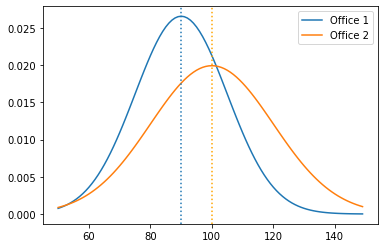

In [9]:
# visualize distributions

x = np.arange(50,150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.plot(x,y1,label= 'Office 1')
plt.plot(x,y2,label = 'Office 2')
plt.axvline(90, ls=':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()

In [5]:
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)
t,p

(-2.7091418459143854, 0.00811206270346016)

In [6]:
if (p < alpha ):
    print ("We reject the null hypothesis!")
else:
    print("We accept the null hypothesis!")

We reject the null hypothesis!


### Exercise Two:
Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Are compact cars more fuel-efficient than the average car?
Do manual cars get better gas mileage than automatic cars?

In [10]:
from pydataset import data
mpg = data('mpg')

In [12]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
#H_0: There is no difference in fuel efficiency in cars from 2008 and 1999
#H-a: There is a difference in fuel efficiency in cars from 2008 and 1999

In [ ]:
How should we measure "fuel-efficiency"?
Two approaches:
    - Run two ttests: one for highway and one for city
    - Run one ttest: using mean for highway and city...

In [15]:
mpg['avg_fe'] = stats.hmean(mpg[['cty','hwy']], axis = 1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [17]:
#getting cars based on the year
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

<AxesSubplot:>

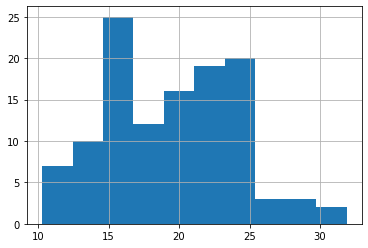

In [18]:
#let's plot!
fe_2008.hist()

<AxesSubplot:>

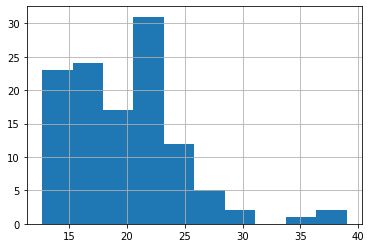

In [19]:
fe_1999.hist()

In [20]:
fe_2008.count()

117

In [21]:
fe_1999.count() #normality not the issue...same sample sized

117

In [22]:
#Let's compare the variance on both data/charts
fe_2008.var(), fe_1999.var()

(22.550836772260343, 25.850396545865912)

In [24]:
#Levenes Test: 
stats.levene(fe_2008, fe_1999)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [25]:
#Let's calculate the t & p
t, p = stats.ttest_ind(fe_2008, fe_1999)

In [26]:
if p < alpha:
    print('Reject null')
else:
    print('fail to reject null')

fail to reject null


In [27]:
#let's look at each mean....
fe_2008.mean(), fe_1999.mean()

(19.488662986569054, 19.68238764869729)

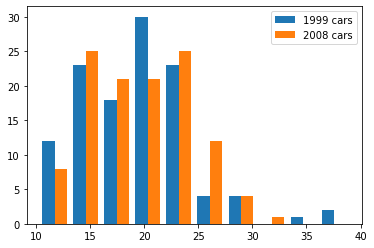

In [28]:
#let's plot out the data
plt.hist([fe_1999, fe_2008], label=['1999 cars', '2008 cars'])
plt.legend(loc='upper right')

### B) Are compact cars more fuel-efficient than the average car?

In [ ]:
# H_0: MPG for compact cars <= mpg for the average car
# H_a: MPG for compact cars > mpg for the average car

In [29]:
#let's look at and find the avg mean for compact cars
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
pop_mean = mpg.avg_fe.mean()

In [30]:
#here's the population mean of all cars
pop_mean

19.585525317633177

In [31]:
#here's compact cars' mean:
fe_compact.mean()

23.500416808701296

<AxesSubplot:>

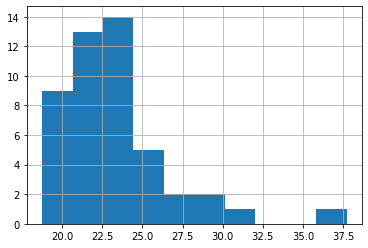

In [32]:
# just by comparisons, the compact car seems to have a higher mean...let's now plot it:
fe_compact.hist()

In [33]:
#let's find the t and p of the two variables (pop mean, and compact cars mean)
t, p = stats.ttest_1samp(fe_compact, pop_mean)
t, p

(7.512360093161354, 1.5617666348807727e-09)

In [34]:
if (p/2 < alpha) and t > 0:
    print('Reject null')

Reject null


### C) Do manual cars get better gas mileage than automatic cars?

In [37]:
mpg.head() #let's look at what we have to work with...

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [38]:
mpg.trans.value_counts() # we will take a look at transmissions on cars..

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [39]:
#We will create two avg variables (trans: auto and trans: manual)
fe_auto=mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual=mpg[mpg.trans.str.contains('manual')].avg_fe

<AxesSubplot:>

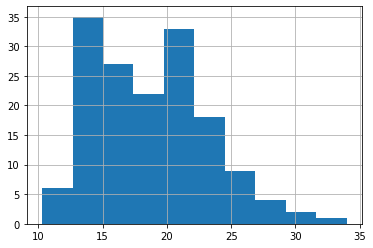

In [40]:
#now let's graph them
fe_auto.hist()

<AxesSubplot:>

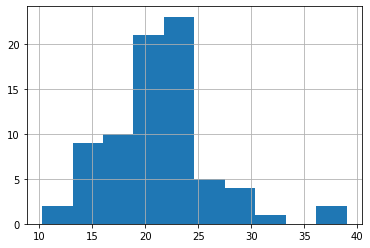

In [41]:
fe_manual.hist()

In [42]:
#now compare variances:
fe_auto.var(), fe_manual.var()

(20.428279095002054, 25.665633639828275)

In [43]:
#Levene Test:
stats.levene(fe_auto, fe_manual)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [47]:
#because we fail to reject our null, we can set our variances True equal (there is a range in the Levene test, but it's based on the shape of our distribution)
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var=True)
t, p/2

(4.652577547151351, 2.7552323050220026e-06)

In [46]:
#Let's take a look at our means of both selected variables
fe_manual.mean(), fe_auto.mean()

(21.629228592155194, 18.583199507835747)

In [50]:
#We will add a new column to have a clean column to plot
mpg['transmisson_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

In [51]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe,transmisson_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,Auto Transmission
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,Manual Transmission
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,Manual Transmission
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,Auto Transmission
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,Auto Transmission


Text(0.5, 1.0, 'Manual transmission get better fuel effiency')

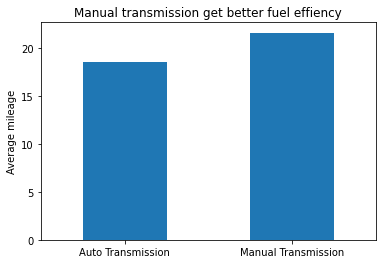

In [55]:
mpg.groupby('transmisson_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Manual transmission get better fuel effiency')

## Correlation Exercises:

### Exercise 1)
Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
import scipy.stats as stats
df = pd.read_csv("Copy of Jennifer Eyring - jemison_spreadsheet_exercises - Table1_Copy.csv")

In [ ]:
df.head()

In [ ]:
#renamed to call on later
df=df.rename(columns={"Service Type": "service_type"})
df

### Does Tenure relate to Monthly Charges?

H0: There is no relation to Monthly charges and tenure
Ha: There is a relation to Monthly charges and tenure

In [ ]:
df.plot.scatter(y='monthly_charges', x='tenure')

In [ ]:
alpha = 0.05

In [ ]:
x = df.tenure
y = df.monthly_charges

In [ ]:
r, p = stats.pearsonr(x,y)
r,p

<b> Conclusion: There is a weak relationship between monthly charges and tenure but it is there.
- Reject the null hypothesis</b>

In [ ]:
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to rejcet the null hypothesis')

### Does Tenure relate to Total Charges?

In [ ]:
df.plot.scatter(y='total_charges', x='tenure')
#visually, yes it looks like there might be a relationship between total and tenure

In [ ]:
x = df.tenure
y = df.total_charges
#to drop nulls, look at spaces needing to be replaced,drop na mehtod (subset dataframe for two variables)

In [ ]:
##cleaning data for any spaces...
df['tenure']= df.tenure.replace(' ',np.nan)
df['total_charges']= df.total_charges.replace(" ",np.nan)

In [ ]:
df_xy=df[['tenure','total_charges','service_type']].dropna()
df_xy

In [ ]:
x=df_xy.tenure
y=df_xy.total_charges

In [ ]:
r, p = stats.pearsonr(x,y)
r,p

#### Conclusion: There is a strong positive correlation between tenure and total_charges

In [ ]:
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to rejcet the null hypothesis')

### What happens if I control for phone and internet service?

In [ ]:
sns.relplot(data=df_xy, y='total_charges', x='tenure', col='service_type',height=8.27, aspect=11.7/8.27)

In [ ]:
df_xy.value_counts('service_type')

In [ ]:
phone=df_xy[df_xy.service_type == 'Phone']
Internet=df_xy[df_xy.service_type == 'Internet']

In [ ]:
r, p = stats.pearsonr(phone.tenure, phone.total_charges)
print('Phone Customers')
print('  r =', r)
print('  p =', p)

In [ ]:
r, p = stats.pearsonr(Internet.tenure, Internet.total_charges)
print('Internet Customers')
print('  r =', r)
print('  p =', p)

### Exercise 2)

In [ ]:
import pandas as pd
import env
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

salaries = pd.read_sql('SELECT * FROM salaries', url)
titles = pd.read_sql('SELECT * FROM titles', url)
employees = pd.read_sql('SELECT * FROM employees', url)

Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?

In [ ]:
salaries.head()

In [ ]:
df_salary = pd.concat([salaries, employees])
df_salary

In [ ]:
df_salary = df_salary['hire_date']= df_salary.hire_date.replace('NaN',0)
df_salary=df_salary[['hire_date']].dropna()

In [ ]:
df_salary.head()

- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [ ]:
#Combining tables into one dataframe
df_jobs = pd.concat([salaries, titles])
df_jobs

In [ ]:
df_jobs['tenure']= df.tenure.replace(' ',np.nan)

In [ ]:
#adding a new column for titles
df_jobs["title_count"] = df_jobs["title"]
df_jobs.head()

In [ ]:
#realized I need to clean up the NaNs:
df_jobs['title']= df_jobs.title.replace('NaN',np.nan)
df_jobs=df_jobs[['title']].dropna()
df_jobs

In [ ]:
#title_salary = pd.concat[salaries,titles]

#salaries['salary_count']= titles['title'].nunique(axis=1)

#title_salary

### Chi Square Exercises

### Exercise One:
Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [155]:
alpha = .05
index = ['Uses a Mac Book', 'Does not Own a Mac Book']
columns = ['Codeup_Student', 'Not_Codeup_Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
observed

,Codeup_Student,Not_Codeup_Student
Uses a Mac Book,49,20
Does not Own a Mac Book,1,30


In [156]:
chi2, p, defg, expected = stats.chi2_contingency(observed)
p

1.4116760526193828e-09

#### Answer: We Reject the Null Hypothesis (that they are independant) because it the data shows that there IS a relationshiop

________________________________________________________________________________

### Exercise Two:

Choose another 2 categorical variables from the mpg dataset and perform a 
c
h
i
2
 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [15]:
from pydataset import data
mpg = data('mpg')

In [22]:
mpg.dtypes

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

Let's use model & transmission to look at relationships.

H0: Model and Transmission of a vehicle are Independant variables from one another.

In [23]:
observed = pd.crosstab(mpg.model, mpg.trans)
chi2, p, defg, expected = stats.chi2_contingency(observed)
p

9.686724361961055e-09

In [ ]:
# There is definitely a relationship here

#### Answer: We Reject the Null Hypothesis

___________________________________________________________________________

### Exercise Three:

Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?

In [148]:
import pandas as pd
import env
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

salaries = pd.read_sql('SELECT * FROM salaries', url)
titles = pd.read_sql('SELECT * FROM titles', url)
employees = pd.read_sql('SELECT * FROM employees', url)

In [112]:
departments = pd.read_sql('SELECT * FROM departments', url)
dep_emp = pd.read_sql('SELECT * FROM dept_emp', url)

In [113]:
e = employees
d = departments
de = dep_emp

In [114]:
dep_emp

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01
...,...,...,...,...
331598,499995,d004,1997-06-02,9999-01-01
331599,499996,d004,1996-05-13,9999-01-01
331600,499997,d005,1987-08-30,9999-01-01
331601,499998,d002,1993-12-27,9999-01-01


In [115]:
d.head()

,dept_no,dept_name
0,d009,Customer Service
1,d005,Development
2,d002,Finance
3,d003,Human Resources
4,d001,Marketing


In [59]:
sql_query = '''
SELECT 
employees.gender,
departments.dept_name
FROM employees
JOIN 
dept_emp ON employees.emp_no = dept_emp.emp_no
JOIN 
departments ON dept_emp.dept_no = departments.dept_no
WHERE departments.dept_name IN ('Sales','Marketing')
AND dept_emp.to_date > NOW();
'''

In [60]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

In [61]:
df = pd.read_sql(sql_query, url)
df.head()

,gender,dept_name
0,F,Marketing
1,M,Marketing
2,F,Marketing
3,F,Marketing
4,F,Marketing


In [62]:
observed = pd.crosstab(df.gender, df.dept_name)
chi2, p, defg, expected = stats.chi2_contingency(observed)
p

0.5691938610810126

#### Answer: Fail to reject the Null Hypothesis

### Is an employee's gender independent of whether or not they are or have been a manager?

In [56]:
#null: gender and job title are independant of one another
#alternative: gender and job title are dependant/relate to one another

In [63]:
query = '''
SELECT 
employees.gender,
titles.title
FROM employees
JOIN 
titles ON employees.emp_no = titles.emp_no
WHERE titles.title = 'Manager';
'''

In [64]:
df = pd.read_sql(query, url)
df.head()

,gender,title
0,M,Manager
1,M,Manager
2,M,Manager
3,F,Manager
4,F,Manager


In [66]:
observed = pd.crosstab(df.gender, df.title)
chi2, p, defg, expected = stats.chi2_contingency(observed)
p

1.0

#### Answer: We Fail to reject the Null Hypothesis